In [1]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Simulation import buffer_simulation, save_obj, load_obj
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.ticker as ticker
from pylab import *
from IPython.display import display,HTML
import cufflinks as cf
import plotly.offline as py



In [16]:
datos  = pd.read_excel('MoRS\Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Grafics.xlsx',sheet_name='introduc_tesis')
tabla= datos.set_index("Voltajes")
tabla
df_tabla = pd.DataFrame(tabla)
df_tabla

,Base,ECC,% Fallos,Unnamed: 4,Unnamed: 5,Fallos
Voltajes,,,,,,
0.51,0.150569,0.146796,55.900000,NaN,NaN,739957
0.52,0.155507,0.172146,23.790000,NaN,NaN,265238
0.53,0.176169,0.331850,6.700000,NaN,1048576.0,72408
0.54,0.280053,0.585180,1.110000,NaN,NaN,11817
0.55,0.385743,0.732911,0.304317,NaN,NaN,3191
0.56,0.534038,0.893955,0.107384,NaN,NaN,1126
0.57,0.610227,0.982380,0.032139,NaN,NaN,337
0.58,0.794689,0.994861,0.005341,NaN,NaN,56
0.59,0.942631,0.996385,0.000572,NaN,NaN,6


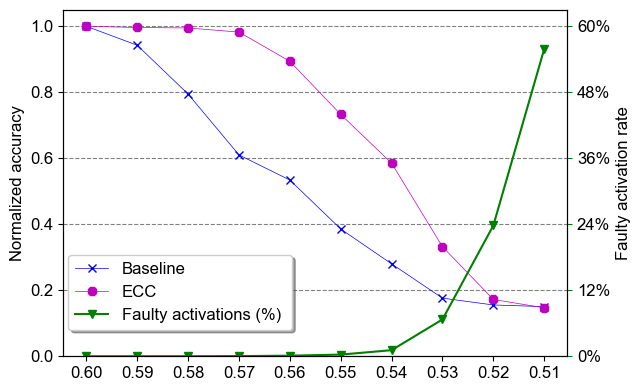

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [17]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib.patches import Rectangle

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

#from datetime import datetime
import time




l='0.5'
marksize=6

x=datos["Voltajes"]
y1 = 0.05 * x**2
y2 = 1 *y1


#plt.rcParams.update({'font.size': 15})
fig1, ax1 = plt.subplots(figsize=(6.5,4.5))
#x_rect = 0.5
#y_rect = 0.5
#width_rect =0.5
#height_rect = 0.1
#
## Crear el cuadro transparente en el primer eje
#rect = plt.Rectangle((x_rect, y_rect), width_rect, height_rect, linewidth=1, edgecolor='g', facecolor='none', alpha=0.5)
#
## Agregar el cuadro al primer eje
#ax1.add_patch(rect)

ax2 = ax1.twinx()





#ax1= fig.add_subplot(1,3,1)
x_values = range(len(x))


#plt.ylabel('Normalized accuracy', fontsize=12,  fontfamily="serif")

#ax1.yaxis.set_label_position("left")
#ax1.yaxis.tick_left()
#ax2.yaxis.set_label_position("right")
ax1.set_ylabel('Normalized accuracy')
ax2.set_ylabel('Faulty activation rate')
#ax1.set_xlabel("$V_{dd}$ (V)")
ax1.xaxis.set_label_coords(0.5, -0.15)
#ax2.yaxis.tick_right()


ax1.set_xticks([0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60]) 
#ax2.set_yticks(labelsize=12,fontfamily="serif") 

#ax1.tick_params(axis="x",labelsize=12,fontfamily="serif") 
#plt.xticks(x, tabla.index, fontsize= 12, fontfamily="serif" )

#ax2.set_ylim(0,  8.1)
ax1.set_ylim(0,1.05)



#ax1.set_title(" ECC vs Baseline SqueezeNet")
ax1.invert_xaxis()

#mport matplotlib.pyplot as plt
import matplotlib.patches as patches

#fig, ax = plt.subplots()

#ax1.plot([1, 4], [1, 4])



ax1.plot(tabla["Base"], label='Baseline', color='b', ls='-', lw=l, marker='x', markersize=marksize)
ax1.plot(tabla["ECC"], label='ECC', color='m', ls='-', lw=l, marker='8', markersize=marksize)
Extra=ax2.plot(tabla["% Fallos"] ,label='Faulty activations (%) ', color='g', ls='-',marker='v', markersize=marksize )
#ax1.plot(tabla["FlipPatch_0.53"], label='FlipPatch 0.53 V', color="b", ls='-', lw=l, marker='x', markersize=marksize)
#ax1.plot(tabla["FlipPatch_0.54"], label='FlipPatch 0.54 V', color="r", ls='-', lw=l, marker='8', markersize=marksize)
#ax1.grid(axis='y', color = 'gray', linestyle = 'dashed')
#ax1.grid(axis='x', color = 'gray', linestyle = 'dashed')
# Definir las coordenadas del cuadro y su tamaño



ax1.yaxis.grid(color='gray', linestyle='dashed')
#ax2.yaxis.grid(color='g', linestyle='dashed')



def porcentaje_formatter(x, pos):
    return f'{x:.0f}%'

# Aplicar la función de formateo al eje y
formatter = FuncFormatter(porcentaje_formatter)
ax2.yaxis.set_major_formatter(formatter)
#line1.set_marker(None)
ax2.tick_params(axis='y', color='g')

fig1.legend(bbox_to_anchor=(0.12,0.15),loc ="lower left", shadow = True)
#
#for legend_handle in legend1.legendHandles:
    #legend_handle.set_alpha(0.0)  
ax2.set_ylim(0,63)
#ax2.xticks(np.arange(0, 60, 12))
ax2.set_yticks(np.arange(0, 63, 12))



plt.savefig('Acc_by_fault_rate_mod.svg', format='svg',transparent = True, bbox_inches = 'tight', pad_inches = 0)

#plt.savefig('Acc_by_fault_rate_mod.pdf ', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#
plt.tight_layout()





plt.show

# Quantización

In [10]:
quantization  = load_obj('quiantización_cifar\Quantization_ResNet_cifar')
#quantization
#Quantization_ResNet_cifar = pd.DataFrame(quantization)
###Acc_all_exp = pd.concat( [DF_words_fallos_I, DF_Funcion, Acc_ResNet,Acc_Xception,Acc_Inception,Acc_VGG19],  axis=1, join='outer')
#Quantization_ResNet_cifar.columns = ['Experiment', 'bits','acc','loss']
#print(Quantization_ResNet_cifar)
#Quantization_ResNet_cifar.to_excel('quantizacion_cifar_Resnet.xlsx', sheet_name='ResNet', index=False)



In [9]:
Quantization_ResNet_cifar = pd.DataFrame(quantization)
##Acc_all_exp = pd.concat( [DF_words_fallos_I, DF_Funcion, Acc_ResNet,Acc_Xception,Acc_Inception,Acc_VGG19],  axis=1, join='outer')
Quantization_ResNet_cifar.columns = ['Experiment', 'bits','acc','loss']
#print(Quantization_ResNet_cifar)
Quantization_ResNet_cifar.to_excel('quantizacion_cifar_Resnet.xlsx', sheet_name='ResNet', index=False)



In [2]:
actv_integer  = pd.read_excel('MoRS\Analisis_Resultados/Acc_Redes_time/Mors_Grafics/distribucion bits.xlsx',sheet_name='actv_integer')
actv_integer= actv_integer.set_index("bits")




actv_integer


,AlexNet,DenseNet,Inception,MobileNet,ResNet,SqueezeNet,VGG16,VGG19,Xception,ZFNet
bits,,,,,,,,,,
0,0.116000,0.296000,0.110,0.389333,0.21,0.256,0.305333,0.131,0.123,0.374667
1,0.344000,0.577333,0.110,0.626667,0.29,0.600,0.410667,0.132,0.123,0.418667
2,0.716000,0.742667,0.092,0.773333,0.66,0.744,0.574667,0.175,0.123,0.625333
3,0.854667,0.914667,0.120,0.872000,0.78,0.912,0.805333,0.175,0.125,0.802667
4,0.885333,0.913333,0.130,0.873000,0.81,0.918,0.805333,0.208,0.250,0.833333
5,0.885333,0.913333,0.140,0.872000,0.81,0.924,0.805333,0.423,0.410,0.833333
6,0.885333,0.913333,0.360,0.872000,0.81,0.931,0.805333,0.632,0.860,0.833333
7,0.885333,0.913333,0.680,0.872000,0.81,0.931,0.805333,0.931,0.931,0.833333
8,0.885333,0.913333,0.780,0.872000,0.81,0.931,0.805333,0.940,0.930,0.833333


# actv_integer

In [61]:
pico_AlexNet = actv_integer['AlexNet'].idxmax()
pico_DenseNet = actv_integer['DenseNet'].idxmax()
pico_Inception = actv_integer['Inception'].idxmax()
pico_MobileNet= actv_integer['MobileNet'].idxmax()
pico_ResNet = actv_integer['ResNet'].idxmax()
pico_SqueezeNet = actv_integer['SqueezeNet'].idxmax()
pico_VGG16 = actv_integer['VGG16'].idxmax()
pico_VGG19= actv_integer['VGG19'].idxmax()
pico_Xceptión = actv_integer['Xception'].idxmax()
pico_ZFNet= actv_integer['ZFNet'].idxmax()

a=  actv_integer['AlexNet'][actv_integer['AlexNet'].idxmax()] 
d = actv_integer['DenseNet'][actv_integer['DenseNet'].idxmax()]
i =actv_integer['Inception'][actv_integer['Inception'].idxmax()]
m =actv_integer['MobileNet'][actv_integer['MobileNet'].idxmax()]
r =actv_integer['ResNet'][actv_integer['ResNet'].idxmax()]
s =actv_integer['SqueezeNet'][actv_integer['SqueezeNet'].idxmax()]
V16= actv_integer['VGG16'][actv_integer['VGG16'].idxmax()]
V19= actv_integer['VGG19'][actv_integer['VGG19'].idxmax()]
xc=actv_integer['Xception'][actv_integer['Xception'].idxmax()]
z =actv_integer['ZFNet'][actv_integer['ZFNet'].idxmax()]

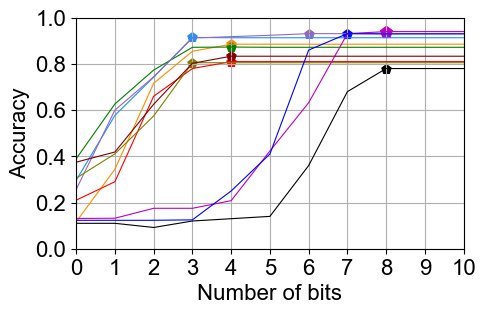

In [62]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
import matplotlib.pyplot as plt
#mpl.rcParams['font.family']='serif'

plt.rcParams['font.size'] = 16 # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif


l='0.8'
lw=0.8
marker_size=50
marker_type='p'


fig1, ax1 = plt.subplots(figsize=(5,3))
#fig, axs = plt.subplots( figsize=(2, 2))

#captions = [
#    "(a) Network accuracy vs number of bits for\n integer part of activations",
#    "(b) Network accuracy vs number of bits for\n fractional part of activations",
#    "(c) Network accuracy vs number of bits for\n integer part of weights",
#    "(d) Network accuracy vs number of bits for\n fractional part of weights"
#]

#labels = [
#    "Number of bits",
#    "Number of bits",
#    "Number of bits",
#    "Number of bits"
#]

#max_index = actv_integer['AlexNet'].index(max(actv_integer['AlexNet']))
pico_AlexNet = actv_integer['AlexNet'].idxmax()

ax1.plot(actv_integer['AlexNet'], label='AlexNet', color='darkorange',lw=l   )
#ax1.plot(actv_integer.index[4], pico_AlexNet, 'o', markersize=10, color='red', label='Punto más alto')
ax1.scatter(pico_AlexNet,a,marker=marker_type,color='darkorange',linewidths=lw,s=marker_size)
ax1.plot(actv_integer['DenseNet'], label='DenseNet', color='dodgerblue' ,lw=l)
ax1.scatter(pico_DenseNet, d,marker=marker_type,color='dodgerblue',linewidths=lw,s=marker_size)
ax1.plot(actv_integer['Inception'], label='Inception', color='black',lw=l)
ax1.scatter(pico_Inception, i,marker=marker_type, color='black',linewidths=lw,s=marker_size)
ax1.plot(actv_integer['MobileNet'],label='MobileNet', color='g', lw=l )
ax1.scatter(pico_MobileNet,m,marker=marker_type,color='g',linewidths=lw,s=marker_size )
ax1.plot(actv_integer['ResNet'],label='ResNet', color='red', lw=l, )
ax1.scatter(pico_ResNet,r,marker=marker_type, color='red',linewidths=lw,s=marker_size )
ax1.plot(actv_integer['SqueezeNet'],label='SqueezeNet', color='#9467bd', lw=l)
ax1.scatter(pico_SqueezeNet, s,marker=marker_type, color='#9467bd',linewidths=lw,s=marker_size )
ax1.plot(actv_integer['VGG16'],label='VGG16', color='olive', lw=l)
ax1.scatter(pico_VGG16, V16, marker=marker_type,color='olive',linewidths=lw,s=marker_size )
ax1.plot(actv_integer['VGG19'],label='VGG19', color='m', lw=l)
ax1.scatter(pico_VGG19, V19,marker=marker_type,color='m',linewidths=lw,s=80)
ax1.plot(actv_integer['Xception'],label='Xception', color='b', lw=l)
ax1.scatter(pico_Xceptión,xc, marker=marker_type,color='b',linewidths=0.9,s=marker_size )
ax1.plot(actv_integer['ZFNet'],label='ZFNet', color='maroon', lw=l)
ax1.scatter(pico_ZFNet,z , marker=marker_type,color='maroon',linewidths=lw,s=marker_size)
ax1.set_yticks(np.arange(0, 1.005, 0.2))
ax1.set_xticks(np.arange(0, 10.00001, 1))
ax1.set_ylabel('Accuracy')  
ax1.set_xlabel('Number of bits')
ax1.grid(True)
#ax1.legend(loc ="lower left",bbox_to_anchor=(0.25,1.02) ,ncol=5, columnspacing=0.9,fontsize=10)
plt.xlim(0,10)




plt.savefig('actv_integer.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0,)
plt.show()
#
#handles, labels = plt.gca().get_legend_handles_labels()
#fig_legend = plt.figure()
#ax_legend = fig_legend.add_subplot(111)
#legend_new = ax_legend.legend(handles, labels, loc='center')
#fig_legend.savefig('legend.png', bbox_inches='tight')



# actv_fracc

In [57]:
actv_fracc  = pd.read_excel('MoRS\Analisis_Resultados/Acc_Redes_time/Mors_Grafics/distribucion bits.xlsx',sheet_name='actv_fracc')
actv_fracc= actv_fracc.set_index("bits")


In [58]:
actv_fracc

,AlexNet,DenseNet,Inception,MobileNet,ResNet,SqueezeNet,VGG16,VGG19,Xception,ZFNet
bits,,,,,,,,,,
0,0.357333,0.084000,0.132,0.144000,0.520,0.229333,0.117333,0.812,0.124235,0.117333
1,0.293333,0.145333,0.236,0.116000,0.552,0.450667,0.117333,0.944,0.278824,0.117333
2,0.460000,0.285333,0.440,0.122667,0.736,0.646667,0.117333,0.948,0.615765,0.409333
3,0.646667,0.525333,0.692,0.122667,0.812,0.838667,0.141333,0.944,0.639765,0.720000
4,0.889433,0.885333,0.724,0.193333,0.817,0.936667,0.416000,0.944,0.792471,0.818667
5,0.884000,0.916600,0.728,0.604000,0.816,0.926667,0.765333,0.944,0.855294,0.825333
6,0.889333,0.916000,0.804,0.717333,0.812,0.928000,0.800000,0.944,0.936824,0.834000
7,0.886667,0.913333,0.740,0.752000,0.812,0.929333,0.800000,0.944,0.930353,0.832000
8,0.885333,0.916000,0.768,0.864000,0.816,0.929333,0.806667,0.944,0.931765,0.833333


In [59]:
pico_AlexNet = actv_fracc['AlexNet'].idxmax()
pico_DenseNet = actv_fracc['DenseNet'].idxmax()
pico_Inception = actv_fracc['Inception'].idxmax()
pico_MobileNet= actv_fracc['MobileNet'].idxmax()
pico_ResNet = actv_fracc['ResNet'].idxmax()
pico_SqueezeNet = actv_fracc['SqueezeNet'].idxmax()
pico_VGG16 = actv_fracc['VGG16'].idxmax()
pico_VGG19= actv_fracc['VGG19'].idxmax()
pico_Xception = actv_fracc['Xception'].idxmax()
pico_ZFNet= actv_fracc['ZFNet'].idxmax()

a=  actv_fracc['AlexNet'][actv_fracc['AlexNet'].idxmax()] 
d = actv_fracc['DenseNet'][actv_fracc['DenseNet'].idxmax()]
i =actv_fracc['Inception'][actv_fracc['Inception'].idxmax()]
m =actv_fracc['MobileNet'][actv_fracc['MobileNet'].idxmax()]
r =actv_fracc['ResNet'][actv_fracc['ResNet'].idxmax()]
s =actv_fracc['SqueezeNet'][actv_fracc['SqueezeNet'].idxmax()]
V16= actv_fracc['VGG16'][actv_fracc['VGG16'].idxmax()]
V19= actv_fracc['VGG19'][actv_fracc['VGG19'].idxmax()]
xc=actv_fracc['Xception'][actv_fracc['Xception'].idxmax()]
z =actv_fracc['ZFNet'][actv_fracc['ZFNet'].idxmax()]

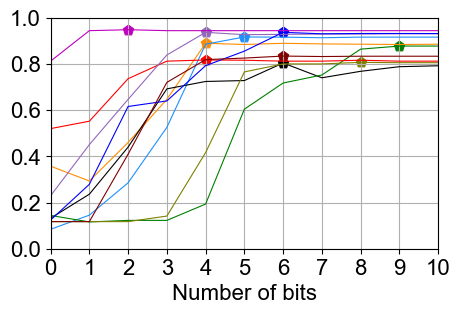

In [60]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
#mpl.rcParams['font.family']='serif'

plt.rcParams['font.size'] = 16 # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif


l='0.8'
lw=0.8
marker_size=60
marker_type='p'


fig1, ax1 = plt.subplots(figsize=(5,3))
#fig, axs = plt.subplots( figsize=(2, 2))

#captions = [
#    "(a) Network accuracy vs number of bits for\n integer part of activations",
#    "(b) Network accuracy vs number of bits for\n fractional part of activations",
#    "(c) Network accuracy vs number of bits for\n integer part of weights",
#    "(d) Network accuracy vs number of bits for\n fractional part of weights"
#]

#labels = [
#    "Number of bits",
#    "Number of bits",
#    "Number of bits",
#    "Number of bits"
#]

#max_index = actv_integer['AlexNet'].index(max(actv_integer['AlexNet']))
#pico_AlexNet = actv_integer['AlexNet'].idxmax()

ax1.plot(actv_fracc['AlexNet'], label='AlexNet', color='darkorange',lw=l   )
ax1.scatter(pico_AlexNet,a,marker=marker_type,color='darkorange',linewidths=lw,s=marker_size)
ax1.plot(actv_fracc['DenseNet'], label='DenseNet', color='dodgerblue' ,lw=l)
ax1.scatter(pico_DenseNet, d,marker=marker_type,color='dodgerblue',linewidths=lw,s=marker_size)
ax1.plot(actv_fracc['Inception'], label='Inception', color='black',lw=l)
ax1.scatter(pico_Inception, i,marker=marker_type, color='black',linewidths=lw,s=marker_size)
ax1.plot(actv_fracc['MobileNet'],label='MobileNet', color='g', lw=l )
ax1.scatter(pico_MobileNet,m,marker=marker_type,color='g',linewidths=lw,s=marker_size )
ax1.plot(actv_fracc['ResNet'],label='ResNet', color='red', lw=l, )
ax1.scatter(pico_ResNet,r,marker=marker_type, color='red',linewidths=lw,s=marker_size )
ax1.plot(actv_fracc['SqueezeNet'],label='SqueezeNet', color='#9467bd', lw=l)
ax1.scatter(pico_SqueezeNet, s,marker=marker_type, color='#9467bd',linewidths=lw,s=marker_size )
ax1.plot(actv_fracc['VGG16'],label='VGG16', color='olive', lw=l)
ax1.scatter(pico_VGG16, V16, marker=marker_type,color='olive',linewidths=lw,s=marker_size )
ax1.plot(actv_fracc['VGG19'],label='VGG19', color='m', lw=l)
ax1.scatter(pico_VGG19, V19,marker=marker_type,color='m',linewidths=lw,s=marker_size)
ax1.plot(actv_fracc['Xception'],label='Xception', color='b', lw=l)
ax1.scatter(pico_Xception,xc, marker=marker_type,color='b',linewidths=0.9,s=marker_size )
ax1.plot(actv_fracc['ZFNet'],label='ZFNet', color='maroon', lw=l)
ax1.scatter(pico_ZFNet,z , marker=marker_type,color='maroon',linewidths=lw,s=marker_size)
ax1.set_yticks(np.arange(0, 1.005, 0.2))
ax1.set_xticks(np.arange(0, 10.00001, 1))
#ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Number of bits')
ax1.grid(True)
#ax1.legend(loc ="lower left",bbox_to_anchor=(0.25,1.02))
plt.xlim(0,10)



plt.savefig('actv_fracc.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)



In [15]:
pico_AlexNet

4

# weights_integer

In [74]:
weights_integer  = pd.read_excel('MoRS\Analisis_Resultados/Acc_Redes_time/Mors_Grafics/distribucion bits.xlsx',sheet_name='weights_integer')
weights_integer= weights_integer.set_index("bits")

weights_integer


,AlexNet,DenseNet,Inception,MobileNet,ResNet,SqueezeNet,VGG16,VGG19,Xception,ZFNet
bits,,,,,,,,,,
0,0.504000,0.845333,0.132,0.870667,0.612,0.932,0.815333,0.945,0.125412,0.833333
1,0.770667,0.913333,0.132,0.873100,0.812,0.932,0.805333,0.944,0.125412,0.833333
2,0.872000,0.923333,0.132,0.872000,0.812,0.932,0.805333,0.944,0.125412,0.833333
3,0.889333,0.913333,0.132,0.872000,0.812,0.932,0.805333,0.944,0.125412,0.833333
4,0.890667,0.913333,0.132,0.873000,0.812,0.932,0.805333,0.944,0.122824,0.833333
5,0.885333,0.913333,0.132,0.872000,0.812,0.932,0.805333,0.944,0.129412,0.833333
6,0.885333,0.913333,0.132,0.872000,0.812,0.932,0.805333,0.944,0.148000,0.833333
7,0.885333,0.913333,0.136,0.872000,0.812,0.932,0.805333,0.944,0.217882,0.833333
8,0.885333,0.913333,0.200,0.872000,0.812,0.932,0.805333,0.944,0.553882,0.833333


In [75]:
pico_AlexNet = weights_integer['AlexNet'].idxmax()
pico_DenseNet = weights_integer['DenseNet'].idxmax()
pico_Inception = weights_integer['Inception'].idxmax()
pico_MobileNet= weights_integer['MobileNet'].idxmax()
pico_ResNet = weights_integer['ResNet'].idxmax()
pico_SqueezeNet = weights_integer['SqueezeNet'].idxmax()
pico_VGG16 = weights_integer['VGG16'].idxmax()
pico_VGG19= weights_integer['VGG19'].idxmax()
pico_Xception = weights_integer['Xception'].idxmax()
pico_ZFNet= weights_integer['ZFNet'].idxmax()

a=  weights_integer['AlexNet'][weights_integer['AlexNet'].idxmax()] 
d = weights_integer['DenseNet'][weights_integer['DenseNet'].idxmax()]
i =weights_integer['Inception'][weights_integer['Inception'].idxmax()]
m =weights_integer['MobileNet'][weights_integer['MobileNet'].idxmax()]
r =weights_integer['ResNet'][weights_integer['ResNet'].idxmax()]
s =weights_integer['SqueezeNet'][weights_integer['SqueezeNet'].idxmax()]
V16= weights_integer['VGG16'][weights_integer['VGG16'].idxmax()]
V19= weights_integer['VGG19'][weights_integer['VGG19'].idxmax()]
xc=weights_integer['Xception'][weights_integer['Xception'].idxmax()]
z =weights_integer['ZFNet'][weights_integer['ZFNet'].idxmax()]

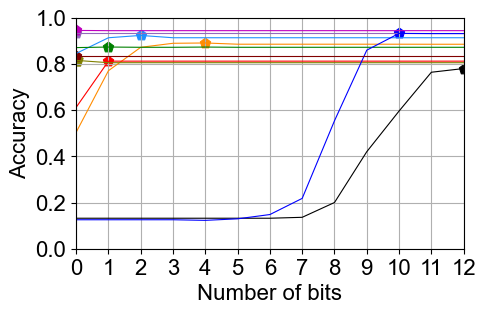

In [76]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
#mpl.rcParams['font.family']='serif'

plt.rcParams['font.size'] = 16  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif


l='0.8'
lw=0.8
marker_size=60
marker_type='p'


fig1, ax1 = plt.subplots(figsize=(5,3))
#fig, axs = plt.subplots( figsize=(2, 2))

#captions = [
#    "(a) Network accuracy vs number of bits for\n integer part of activations",
#    "(b) Network accuracy vs number of bits for\n fractional part of activations",
#    "(c) Network accuracy vs number of bits for\n integer part of weights",
#    "(d) Network accuracy vs number of bits for\n fractional part of weights"
#]

#labels = [
#    "Number of bits",
#    "Number of bits",
#    "Number of bits",
#    "Number of bits"
#]



ax1.plot(weights_integer['AlexNet'], label='AlexNet', color='darkorange',lw=l   )
#ax1.plot(actv_integer.index[4], pico_AlexNet, 'o', markersize=10, color='red', label='Punto más alto')
ax1.scatter(pico_AlexNet,a,marker=marker_type,color='darkorange',linewidths=lw,s=marker_size)
ax1.plot(weights_integer['DenseNet'], label='DenseNet', color='dodgerblue' ,lw=l)
ax1.scatter(pico_DenseNet, d,marker=marker_type,color='dodgerblue',linewidths=lw,s=marker_size)
ax1.plot(weights_integer['Inception'], label='Inception', color='black',lw=l)
ax1.scatter(pico_Inception, i,marker=marker_type, color='black',linewidths=lw,s=marker_size)
ax1.plot(weights_integer['MobileNet'],label='MobileNet', color='g', lw=l )
ax1.scatter(pico_MobileNet,m,marker=marker_type,color='g',linewidths=lw,s=marker_size )
ax1.plot(weights_integer['ResNet'],label='ResNet', color='red', lw=l, )
ax1.scatter(pico_ResNet,r,marker=marker_type, color='red',linewidths=lw,s=marker_size )
ax1.plot(weights_integer['SqueezeNet'],label='SqueezeNet', color='#9467bd', lw=l)
ax1.scatter(pico_SqueezeNet, s,marker=marker_type, color='#9467bd',linewidths=lw,s=marker_size )
ax1.plot(weights_integer['VGG16'],label='VGG16', color='olive', lw=l)
ax1.scatter(pico_VGG16, V16, marker=marker_type,color='olive',linewidths=lw,s=100 )
ax1.plot(weights_integer['VGG19'],label='VGG19', color='m', lw=l)
ax1.scatter(pico_VGG19, V19,marker=marker_type,color='m',linewidths=lw,s=marker_size)
ax1.plot(weights_integer['Xception'],label='Xception', color='b', lw=l)
ax1.scatter(pico_Xception,xc, marker=marker_type,color='b',linewidths=lw,s=marker_size )
ax1.plot(weights_integer['ZFNet'],label='ZFNet', color='maroon', lw=l)
ax1.scatter(pico_ZFNet,z , marker=marker_type,color='maroon',linewidths=lw,s=marker_size)
ax1.set_yticks(np.arange(0, 1.005, 0.2))
ax1.set_xticks(np.arange(0, 12.05, 1))
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Number of bits')
ax1.grid(True)
#ax1.legend(loc ="lower left",bbox_to_anchor=(0.25,1.02))
plt.xlim(0,12)



plt.savefig('weights_integer.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)


# weights_fracc

In [77]:

weights_fracc  = pd.read_excel('MoRS\Analisis_Resultados/Acc_Redes_time/Mors_Grafics/distribucion bits.xlsx',sheet_name='weights_fracc')
weights_fracc= weights_fracc.set_index("bits")

weights_fracc

,AlexNet,DenseNet,Inception,MobileNet,ResNet,SqueezeNet,VGG16,VGG19,Xception,ZFNet
bits,,,,,,,,,,
0,0.117333,0.117333,0.148,0.117333,0.148,0.117333,0.117333,0.148,0.126353,0.117333
1,0.117333,0.117333,0.148,0.117333,0.116,0.117333,0.117333,0.148,0.126353,0.117333
2,0.117333,0.117333,0.148,0.117333,0.144,0.117333,0.117333,0.148,0.126353,0.117333
3,0.116000,0.116000,0.148,0.116000,0.552,0.117333,0.117333,0.148,0.125412,0.117333
4,0.190667,0.116000,0.132,0.116000,0.784,0.292000,0.117333,0.148,0.125412,0.129333
5,0.721333,0.116000,0.132,0.122667,0.816,0.756000,0.433333,0.620,0.125412,0.530667
6,0.852000,0.116000,0.192,0.122667,0.826,0.920000,0.585333,0.676,0.125412,0.573333
7,0.889333,0.116000,0.624,0.122667,0.808,0.933333,0.704000,0.648,0.888235,0.797333
8,0.889333,0.116000,0.720,0.122667,0.820,0.933333,0.808667,0.945,0.937059,0.836000


In [78]:
pico_AlexNet = weights_fracc['AlexNet'].idxmax()
pico_DenseNet = weights_fracc['DenseNet'].idxmax()
pico_Inception = weights_fracc['Inception'].idxmax()
pico_MobileNet= weights_fracc['MobileNet'].idxmax()
pico_ResNet = weights_fracc['ResNet'].idxmax()
pico_SqueezeNet = weights_fracc['SqueezeNet'].idxmax()
pico_VGG16 = weights_fracc['VGG16'].idxmax()
pico_VGG19= weights_fracc['VGG19'].idxmax()
pico_Xception = weights_fracc['Xception'].idxmax()
pico_ZFNet= weights_fracc['ZFNet'].idxmax()

a=  weights_fracc['AlexNet'][weights_fracc['AlexNet'].idxmax()] 
d = weights_fracc['DenseNet'][weights_fracc['DenseNet'].idxmax()]
i =weights_fracc['Inception'][weights_fracc['Inception'].idxmax()]
m =weights_fracc['MobileNet'][weights_fracc['MobileNet'].idxmax()]
r =weights_fracc['ResNet'][weights_fracc['ResNet'].idxmax()]
s =weights_fracc['SqueezeNet'][weights_fracc['SqueezeNet'].idxmax()]
V16= weights_fracc['VGG16'][weights_fracc['VGG16'].idxmax()]
V19= weights_fracc['VGG19'][weights_fracc['VGG19'].idxmax()]
xc=weights_fracc['Xception'][weights_fracc['Xception'].idxmax()]
z =weights_fracc['ZFNet'][weights_fracc['ZFNet'].idxmax()]

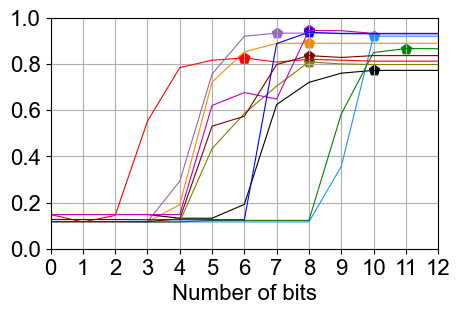

In [79]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
#mpl.rcParams['font.family']='serif'

plt.rcParams['font.size'] = 16  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif


l='0.8'
lw=0.8
marker_size=60
marker_type='p'


fig1, ax1 = plt.subplots(figsize=(5,3))
#fig, axs = plt.subplots( figsize=(2, 2))

#captions = [
#    "(a) Network accuracy vs number of bits for\n integer part of activations",
#    "(b) Network accuracy vs number of bits for\n fractional part of activations",
#    "(c) Network accuracy vs number of bits for\n integer part of weights",
#    "(d) Network accuracy vs number of bits for\n fractional part of weights"
#]

#labels = [
#    "Number of bits",
#    "Number of bits",
#    "Number of bits",
#    "Number of bits"
#]



ax1.plot(weights_fracc['AlexNet'], label='AlexNet', color='darkorange',lw=l   )
ax1.scatter(pico_AlexNet,a,marker=marker_type,color='darkorange',linewidths=lw,s=marker_size)
ax1.plot(weights_fracc['DenseNet'], label='DenseNet', color='dodgerblue' ,lw=l)
ax1.scatter(pico_DenseNet, d,marker=marker_type,color='dodgerblue',linewidths=lw,s=marker_size)
ax1.plot(weights_fracc['Inception'], label='Inception', color='black',lw=l)
ax1.scatter(pico_Inception, i,marker=marker_type, color='black',linewidths=lw,s=marker_size)
ax1.plot(weights_fracc['MobileNet'],label='MobileNet', color='g', lw=l )
ax1.scatter(pico_MobileNet,m,marker=marker_type,color='g',linewidths=lw,s=marker_size )
ax1.plot(weights_fracc['ResNet'],label='ResNet', color='red', lw=l, )
ax1.scatter(pico_ResNet,r,marker=marker_type, color='red',linewidths=lw,s=70 )
ax1.plot(weights_fracc['SqueezeNet'],label='SqueezeNet', color='#9467bd', lw=l)
ax1.scatter(pico_SqueezeNet, s,marker=marker_type, color='#9467bd',linewidths=lw,s=marker_size )
ax1.plot(weights_fracc['VGG16'],label='VGG16', color='olive', lw=l)
ax1.scatter(pico_VGG16, V16, marker=marker_type,color='olive',linewidths=lw,s=marker_size )
ax1.plot(weights_fracc['VGG19'],label='VGG19', color='m', lw=l)
ax1.scatter(pico_VGG19, V19,marker=marker_type,color='m',linewidths=lw,s=marker_size)
ax1.plot(weights_fracc['Xception'],label='Xception', color='b', lw=l)
ax1.scatter(pico_Xception,xc, marker=marker_type,color='b',linewidths=lw,s=marker_size )
ax1.plot(weights_fracc['ZFNet'],label='ZFNet', color='maroon', lw=l)
ax1.scatter(pico_ZFNet,z , marker=marker_type,color='maroon',linewidths=lw,s=marker_size)
ax1.set_yticks(np.arange(0, 1.005, 0.2))
ax1.set_xticks(np.arange(0, 12.05, 1))
#ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Number of bits')
ax1.grid(True)
#ax1.legend(loc ="lower left",bbox_to_anchor=(0.25,1.02))
plt.xlim(0,12)



plt.savefig('weights_fracc.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)


## Weights_and_Activations

In [91]:
Weig_actv  = pd.read_excel('MoRS\Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Grafics.xlsx',sheet_name='Wights_Actvs_ECC_NoECC')
graf_Weig_actvs= Weig_actv.set_index("Voltajes")
graf_Weig_actvs


,Weights & No ECC,Activations & No ECC,Weights & ECC,Activations & ECC
Voltajes,,,,
0.51,0.160000,0.150569,0.160000,0.146796
0.52,0.142693,0.155507,0.182644,0.172146
0.53,0.195863,0.176169,0.516804,0.331850
0.54,0.448079,0.280053,0.751053,0.585180
0.55,0.697030,0.385743,0.893916,0.732911
0.56,0.854942,0.534038,0.950097,0.893955
0.57,0.925948,0.610227,0.981679,0.982380
0.58,0.980211,0.794689,0.988995,0.994861
0.59,1.000000,0.942631,1.000000,0.996385


In [98]:
x=graf_Weig_actvs.index

range(0, 10)


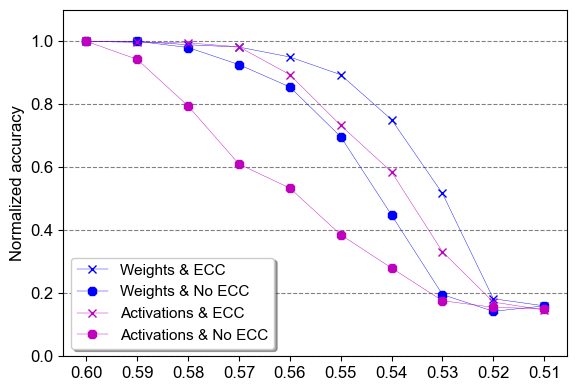

<Figure size 640x480 with 0 Axes>

In [92]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
#from datetime import datetime
import time



plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif




l='0.3'
marksize=6

x=graf_Weig_actvs.index

#fig = plt.figure(figsize=(30,5), dpi=100)
fig1, ax2 = plt.subplots(figsize=(6.5,4.5))
x_values = range(len(x))
print(x_values)


#plt.xlabel("$V_{dd}$ (V)" )
plt.ylabel('Normalized accuracy')
#plt.xticks( fontsize= 12, fontfamily="serif" )
#plt.yticks( fontsize= 12, fontfamily="serif" )
ax2.set_ylim(0,1.1)
#ax2.set_xlabel("$V_{dd}$ (V)")
ax2.xaxis.set_label_coords(0.5, -0.15)





ax2.plot(graf_Weig_actvs["Weights & ECC"], label='Weights & ECC', color='b', ls='-', lw=l, marker='x', markersize=marksize)
ax2.plot(graf_Weig_actvs["Weights & No ECC"], label='Weights & No ECC', color='b', ls='-', lw=l, marker='8', markersize=marksize)
ax2.plot(graf_Weig_actvs["Activations & ECC"], label='Activations & ECC', color="m", ls='-', lw=l, marker='x', markersize=marksize)
ax2.plot(graf_Weig_actvs["Activations & No ECC"], label='Activations & No ECC', color="m", ls='-', lw=l, marker='8', markersize=marksize)
ax2.grid(axis='y', color = 'gray', linestyle = 'dashed')
ax2.legend(fontsize=11, shadow = True)
#ax2.set_xlim(0.51,0.61)
#ax2.xticks(np.arange(0, 60, 12))
ax2.set_xticks(np.arange(0.51, 0.61, 0.01))
ax2.invert_xaxis()

plt.savefig('tesis_weights_acts.svg', format='svg',transparent = True, bbox_inches = 'tight', pad_inches = 0)

#plt.savefig('tesis_weights_acts.png', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#
plt.tight_layout()



# capitulo 6 propuesta f+p (Low-Faulty)

In [53]:
import pandas as pd
acc_low_and_high_Low_faulty=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/ACC_tipo_palabras_tecnicas.xlsx',sheet_name='graf_tesis_low-vdd', usecols=["Tecnic" ,"0.54 V","0.56 V","0.58 V"])
acc_low_and_high_Low_faulty= acc_low_and_high_Low_faulty.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
acc_low_and_high_Low_faulty
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])


,0.54 V,0.56 V,0.58 V
Tecnic,,,
LO,1.000449,-0.000449,0.000000
L&HO,0.908832,0.091916,-0.000299
HO,0.397156,0.460928,0.128593
LO,1.003066,-0.000146,0.000000
L&HO,1.001022,0.002044,-0.000292
HO,0.523650,0.473723,0.005985
LO,0.941146,0.072396,-0.000521
L&HO,0.171875,0.738021,0.007292
HO,0.171875,0.000000,0.367708


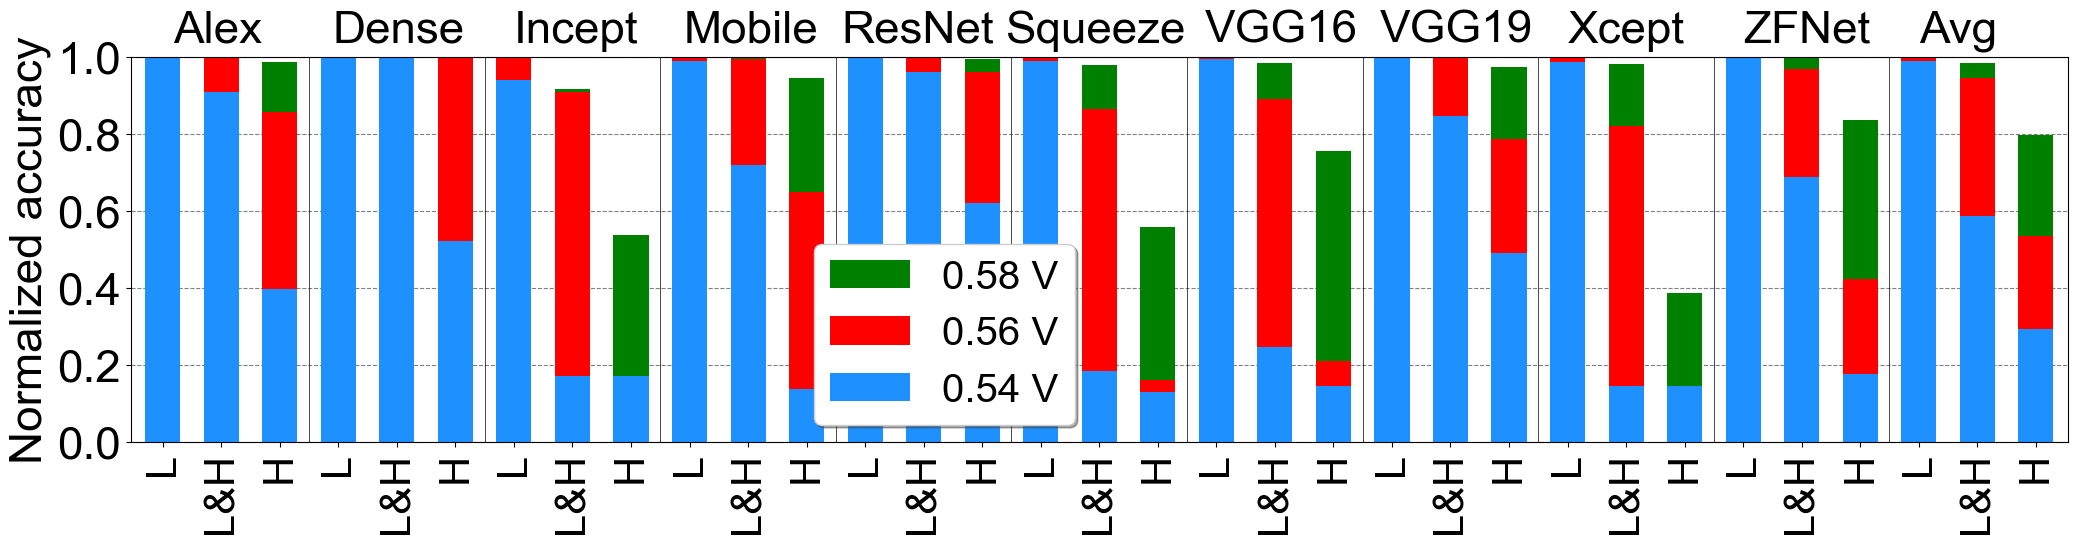

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile

plt.rcParams['font.size'] = 33 # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

n = len(acc_low_and_high.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
coloresRedes = [ 'dodgerblue','red', 'green',]
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=acc_low_and_high_Low_faulty.plot(kind ='bar' ,stacked = True,width = 0.60, color = coloresRedes,
                          figsize=(25,5),  zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)
xlabels=['L','L&H','H']*11
plt.ylabel('Normalized accuracy')
plt.xticks(x, xlabels,fontsize=30 )

plt.ylim(0,1)

plt.xticks(rotation = 90 )
yticks_positions = np.arange(0, 1.02, 0.2)
plt.yticks(yticks_positions,rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')

handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc ="center",bbox_to_anchor=(0.42,0.28),shadow = True,fontsize=29)


#plt.legend(fontsize=20)
#["0.58","0.56","0.54"]

plt.text(0.18, 1.04, 'Alex')
plt.text(2.9, 1.04, 'Dense')
plt.text(6, 1.04, 'Incept')
plt.text(8.9, 1.04, 'Mobile')
plt.text(11.6, 1.04, 'ResNet')
plt.text(14.4,1.04, 'Squeeze')
plt.text(17.8, 1.04, 'VGG16')
plt.text(20.8, 1.04, 'VGG19')
plt.text(24, 1.04,'Xcept' )
plt.text(27, 1.04, 'ZFNet')
plt.text(30, 1.04, 'Avg')

plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=14.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=20.5, ymax= 5, color="black",linewidth=0.5)#vgg16
plt.axvline(x=23.5, ymax= 5, color="black",linewidth=0.5)#vgg19
plt.axvline(x=26.5, ymax= 5, color="black",linewidth=0.5)#xcep
plt.axvline(x=29.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('Tesis_acc_low_faulty_L_H_both_.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)

# capitulo 7 propuesta SaS (Ultra-Low-Faulty)

In [9]:
import pandas as pd
acc_low_and_high=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/ACC_tipo_palabras_tecnicas.xlsx',sheet_name='graf_tesis_ultra-vdd', usecols=["Tecnic" ,"0.53 V","0.52 V","0.51 V"])
acc_low_and_high= acc_low_and_high.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
acc_low_and_high
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])


,0.51 V,0.52 V,0.53 V
Tecnic,,,
LO,0.986377,0.010479,0.005090
L&HO,0.136527,0.224401,0.228892
HO,0.147904,-0.014222,0.069461
LO,0.999270,0.003650,-0.000292
L&HO,0.128467,0.311241,0.298686
HO,0.128467,0.000000,0.004672
LO,0.427083,0.270833,0.151042
L&HO,0.171875,0.000000,-0.025857
HO,0.171875,0.000000,0.000000


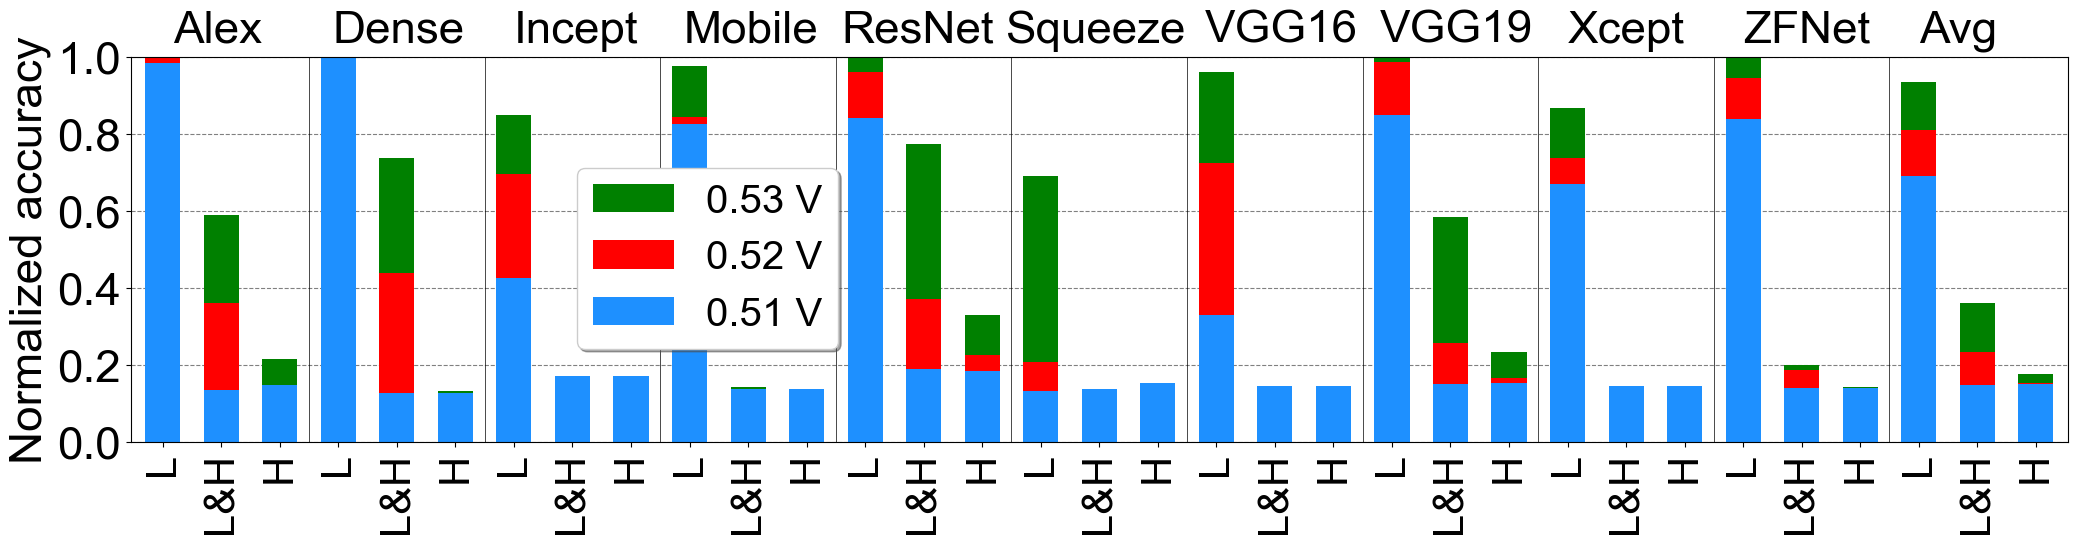

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile

plt.rcParams['font.size'] = 33 # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

n = len(acc_low_and_high.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
coloresRedes = [ 'dodgerblue','red', 'green',]
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=acc_low_and_high.plot(kind ='bar' ,stacked = True,width = 0.60, color = coloresRedes,
                          figsize=(25,5),  zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

xlabels=['L','L&H','H']*11
plt.ylabel('Normalized accuracy')
plt.xticks(x, xlabels,fontsize=30 )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1)

plt.xticks(rotation = 90)
yticks_positions = np.arange(0, 1.02, 0.2)
plt.yticks(yticks_positions,rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')

handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc ="lower left",bbox_to_anchor=(0.22,0.19),shadow = True,fontsize=29)
#plt.legend(fontsize=14,loc ="lower left", shadow = True)
#["0.58","0.56","0.54"]

plt.text(0.18, 1.04, 'Alex')
plt.text(2.9, 1.04, 'Dense')
plt.text(6, 1.04, 'Incept')
plt.text(8.9, 1.04, 'Mobile')
plt.text(11.6, 1.04, 'ResNet')
plt.text(14.4,1.04, 'Squeeze')
plt.text(17.8, 1.04, 'VGG16')
plt.text(20.8, 1.04, 'VGG19')
plt.text(24, 1.04,'Xcept' )
plt.text(27, 1.04, 'ZFNet')
plt.text(30, 1.04, 'Avg')

plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=14.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=20.5, ymax= 5, color="black",linewidth=0.5)#vgg16
plt.axvline(x=23.5, ymax= 5, color="black",linewidth=0.5)#vgg19
plt.axvline(x=26.5, ymax= 5, color="black",linewidth=0.5)#xcep
plt.axvline(x=29.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('Tesis_acc_Ultra_low_and_high_and_both.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)


# capitulo 7 L_F(HO)

In [13]:
import pandas as pd
acc_low_and_F_high=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/ACC_tipo_palabras_tecnicas.xlsx',sheet_name='graf_tesis_less_VBW', usecols=["Tecnic" ,"0.53 V","0.52 V","0.51 V"])
acc_low_and_F_high= acc_low_and_F_high.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
acc_low_and_F_high
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])


,0.51 V,0.52 V,0.53 V
Tecnic,,,
L&H,0.209880,0.547605,0.242515
L+f(H),0.967066,0.023952,0.011377
L&H,0.128467,0.818978,0.055474
L+f(H),0.997956,0.002774,0.002044
L&H,0.171875,0.000000,0.830208
L+f(H),0.158333,0.007292,-0.006250
L&H,0.139183,0.086233,0.772617
L+f(H),0.812405,0.029501,0.057791
L&H,0.286700,0.560099,0.153202


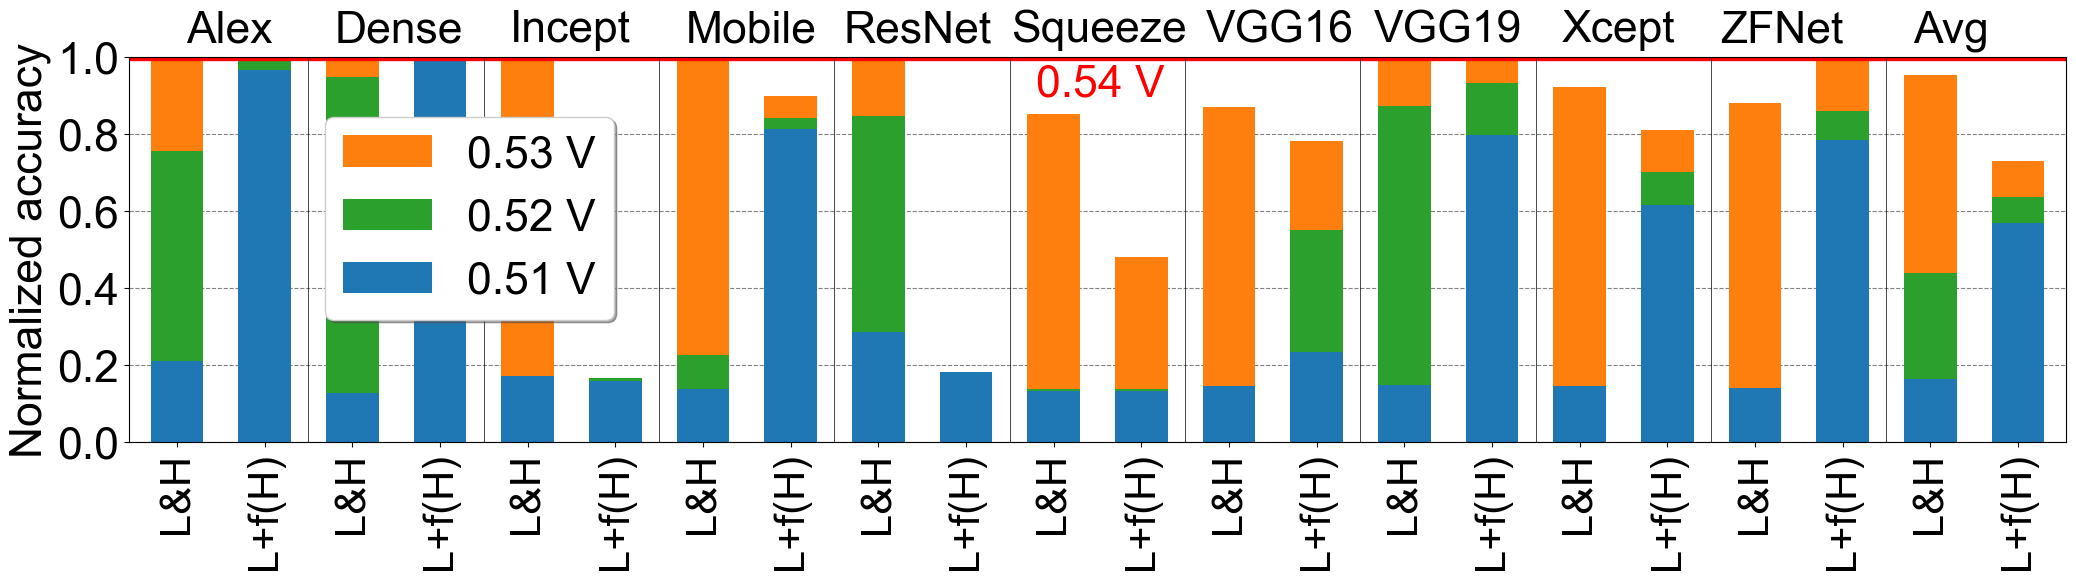

In [14]:
plt.rcParams['font.size'] = 32 # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

#plt.rcParams['axes.titlesize'] = 14  # Tamaño del título de los ejes
#plt.rcParams['axes.labelsize'] = 14 # Tamaño de las etiquetas de los ejes
#plt.rcParams['legend.fontsize'] = 14  # Tamaño de la fuente de las leyendas
#plt.rcParams['xtick.labelsize'] = 14  # Tamaño de las etiquetas del eje x
#plt.rcParams['ytick.labelsize'] = 14  # Tamaño de las etiquetas del eje y

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
n = len(acc_low_and_F_high.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
#coloresRedes = ['#ff7f0e', 'green','dodgerblue']
#coloresRedes = ['#ffbb78', '#1f77b4','#7f7f7f']
coloresRedes = ['#1f77b4', '#2ca02c', '#ff7f0e']
#coloresRedes = ['#d62728', '#2ca02c', '#9467bd']
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

acc=acc_low_and_F_high.plot(kind ='bar' ,stacked = True,width = 0.60, color = coloresRedes,
                          figsize=(25,5),  zorder=2)

#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

xlabels=['L&H','L+f(H)']*11
plt.ylabel('Normalized accuracy')
plt.xticks(x, xlabels,fontsize=30 )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1)

#bars.set_ylim(bottom=0, top=3)

plt.xticks(rotation = 90),
yticks_positions = np.arange(0, 1.02, 0.2)
plt.yticks(yticks_positions,rotation = 0)


plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')



handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
legend1=plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc ="lower left",
           bbox_to_anchor=(0.09,0.26),shadow = True)

#plt.legend(fontsize=14,loc ="lower left", shadow = True)
#["0.58","0.56","0.54"]


plt.text(0.10, 1.04, 'Alex')
plt.text(1.8, 1.04, 'Dense')
plt.text(3.8, 1.04, 'Incept')
plt.text(5.8, 1.04, 'Mobile')
plt.text(7.6, 1.04, 'ResNet')
plt.text(9.52,1.04, 'Squeeze')
plt.text(11.74, 1.04, 'VGG16')
plt.text(13.65, 1.04, 'VGG19')
plt.text(15.8, 1.04,'Xcept' )
plt.text(17.6, 1.04, 'ZFNet')
plt.text(19.8, 1.04, 'Avg')

#plt.axhline(y=50, color='r', linestyle='--')
#plt.axhline(y=1, color='red', linestyle='-', label='0.54 V')

plt.text(9.8, 0.90, '0.54 V',fontsize=32, color="red")
plt.axhline(y=1, color="red",linestyle='-',linewidth=6,label='0.54 V')#Alex
#legend2 = plt.legend(['0.54 V'], loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.89))
#custom_legend = [Line2D([0], [0], color='red', lw=1.7, label='0.54 V')]
#plt.legend(handles=custom_legend, loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.875),shadow = True)
#plt.gca().add_artist(legend1)
plt.axvline(x=1.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=3.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=7.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=9.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=13.5, ymax= 5, color="black",linewidth=0.5)#vgg16
plt.axvline(x=15.5, ymax= 5, color="black",linewidth=0.5)#vgg19
plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#xcep
plt.axvline(x=19.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('acc_LO_F(HO).pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)



# Generar graficos: cantidad de fallos x bits (acumulado)

In [2]:
fallos_xbits =pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/concretando análisis/cantidad_fallos_xbits.xlsx',sheet_name='fallosxbits')
bits= fallos_xbits.set_index("bits")
fail_xbits=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/concretando análisis/cantidad_fallos_xbits.xlsx',sheet_name='fallosxbits', usecols=["Acum_Base","Acum_Volt" ])/10360


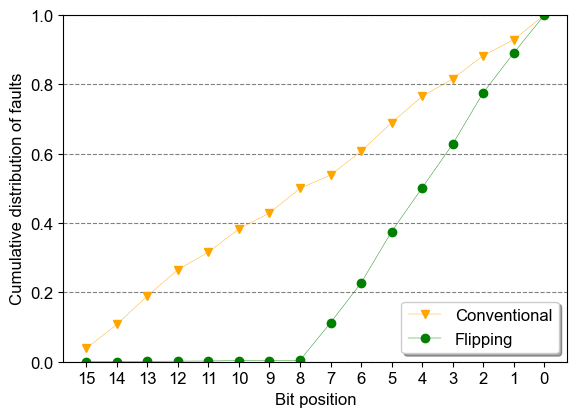

In [4]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
import matplotlib as mpl  



plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif




l='0.3'
marksize=6

x=fallos_xbits["bits"]
fig1, ax1 = plt.subplots(figsize=(6.5,4.5))

x_values = range(len(x))

plt.xlabel('Bit position')
#plt.xlabel('Posición del bit', fontsize=12,  fontfamily="serif")
plt.ylabel('Cumulative distribution of faults')
plt.xticks(x_values, x)


ax1.set_ylim(0,1)
#ax1.set_title(" Accumulated bit errors")


ax1.plot(fail_xbits["Acum_Base"], label='Conventional', color="orange", ls='-', lw=l, marker='v', markersize=marksize, zorder=2)
ax1.plot(fail_xbits["Acum_Volt"], label='Flipping', color='g', ls='-', lw=l, marker='o', markersize=marksize, zorder=2)
#ax1.plot(df["Normalize"], color='dimgray', ls='-', lw='2', marker='D', markersize='6')
ax1.grid(axis='y', color = 'gray', linestyle = 'dashed')
ax1.legend(fontsize=12, loc ="lower right", shadow = True)

plt.savefig('Errores_bit_acumulados.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
#pdfFile=PdfPages("Accumulated_bit_errors.pdf")
#pdfFile=PdfPages("Errores_bit_acumulados.pdf")
#pdfFile.savefig(fig1, transparent = True, bbox_inches = 'tight', pad_inches = 0)
#pdfFile.close()


# Resultados

In [4]:
import pandas as pd
Poposed_1=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Grafics.xlsx',sheet_name='Resultados_proposed_1',usecols=["redes","Base","I-A ECC", "ECC","Flip","F+P"] )
Poposed_1= Poposed_1.set_index("redes")
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])


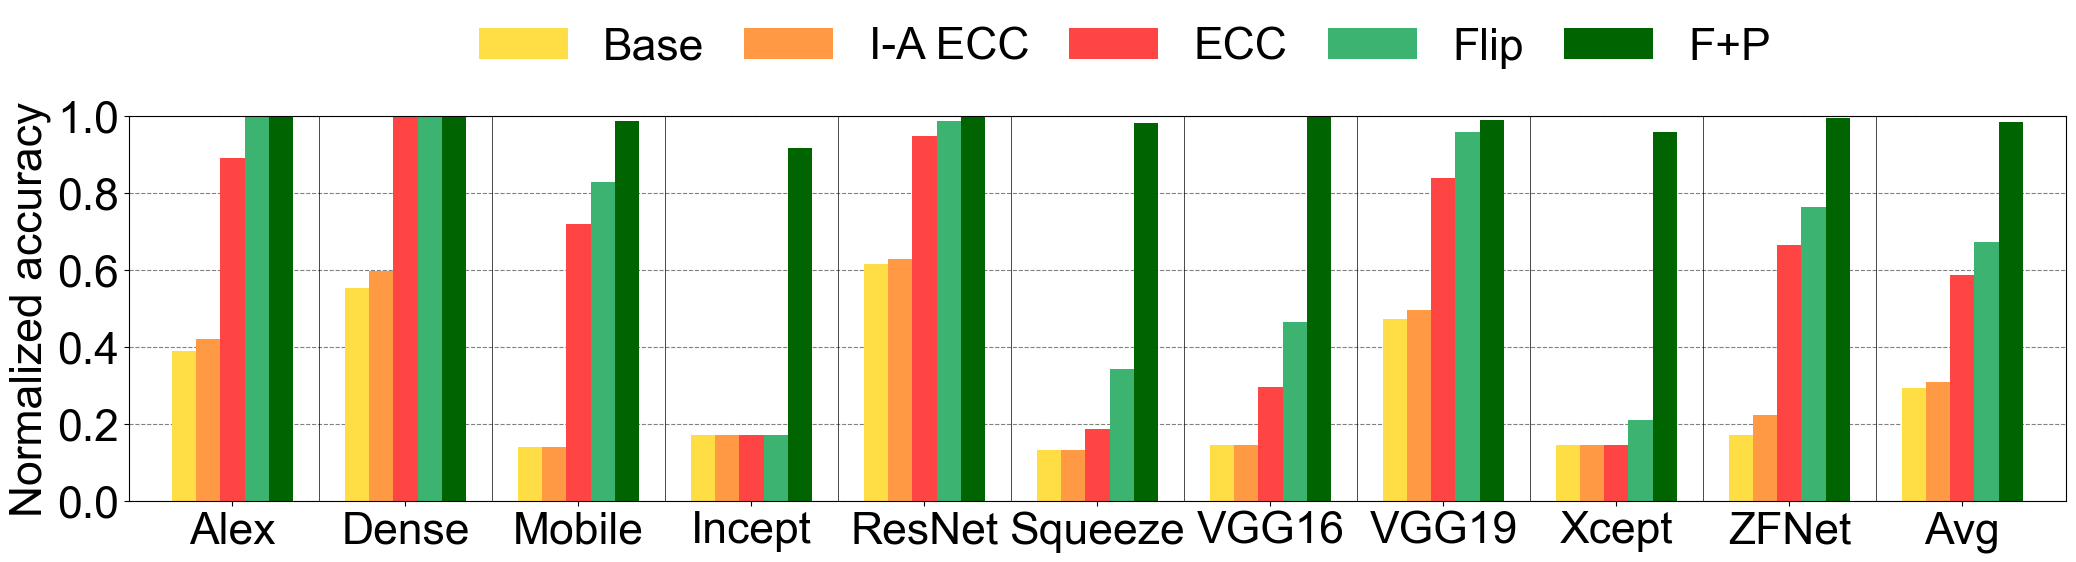

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
plt.rcParams['font.size'] = 32 # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

n = len(Poposed_1.index)

 
x = np.arange(n)

coloresRedes = [ '#FFDD44','#FF9944','#FF4444','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(20,5), dpi=100)

Poposed_1.plot(kind ='bar', width = 0.70, color = coloresRedes, figsize=(25,5), zorder=2 );
#plt.legend(  fontsize=10, loc ="lower left",bbox_to_anchor=(0.1,0.1), shadow = True)
lg = plt.legend(  loc ="lower left",bbox_to_anchor=(0.16,1.02), shadow = False, ncol=5, columnspacing=0.9)
lg.draw_frame(False)
#plt.legend(  fontsize=11, bbox_to_anchor=(0.653,0.2),shadow = True)
plt.ylim(0,1.0)
plt.ylabel('Normalized accuracy')
plt.xlabel('')
yticks_positions = np.arange(0, 1.02, 0.2)
plt.yticks(yticks_positions,rotation = 0)
plt.xticks(x, Poposed_1.index)
plt.xticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')

plt.axvline(x=0.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=1.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=3.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=4.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=6.5, ymax= 5, color="black",linewidth=0.5)#vgg16
plt.axvline(x=7.5, ymax= 5, color="black",linewidth=0.5)#vgg19
plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#xcep
plt.axvline(x=9.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('resultados_proposed_1.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#pdfFile=PdfPages("Analizando_fichero_detalle\Alterado_fichero\concretando análisis\gráficos\Resumen_acc_experimentos.pdf")
#pdfFile.savefig(fig, transparent = True, bbox_inches = 'tight', pad_inches = 0)
#pdfFile.close()


NameError: name 'actv_integer' is not defined

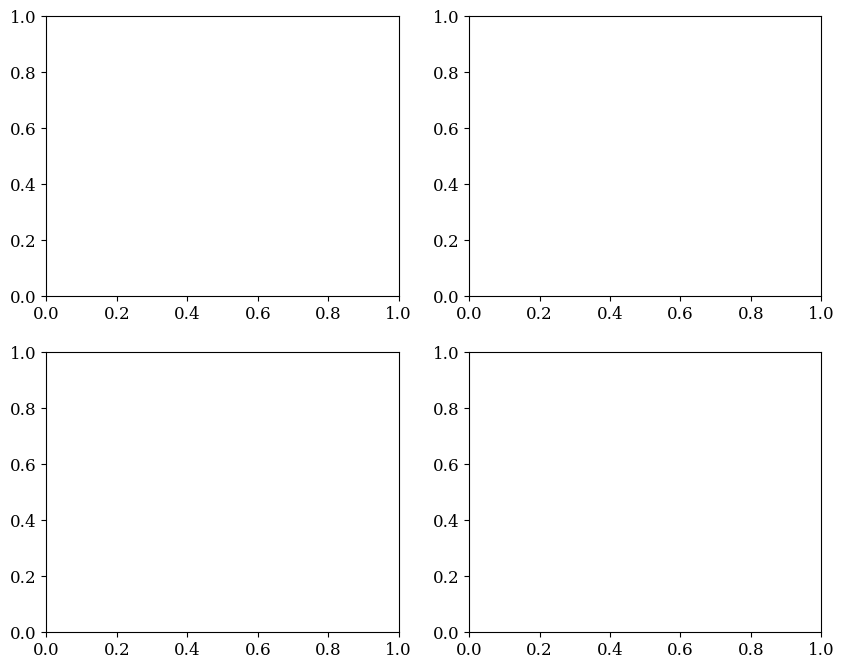

In [5]:
 from matplotlib.backends.backend_pdf import PdfPages, PdfFile
mpl.rcParams['font.family']='serif'



l='0.1'
marksize=6



fig, axs = plt.subplots(2, 2, figsize=(10, 8))

captions = [
    "(a) Network accuracy vs number of bits for\n integer part of activations",
    "(b) Network accuracy vs number of bits for\n fractional part of activations",
    "(c) Network accuracy vs number of bits for\n integer part of weights",
    "(d) Network accuracy vs number of bits for\n fractional part of weights"
]

labels = [
    "Number of bits",
    "Number of bits",
    "Number of bits",
    "Number of bits"
]


pico_AlexNet = actv_integer['AlexNet'].idxmax()
pico_DenseNet = actv_integer['DenseNet'].idxmax()
pico_Inception = actv_integer['Inception'].idxmax()
pico_MobileNet= actv_integer['MobileNet'].idxmax()
pico_ResNet = actv_integer['ResNet'].idxmax()
pico_SqueezeNet = actv_integer['SqueezeNet'].idxmax()
pico_VGG16 = actv_integer['VGG16'].idxmax()
pico_VGG19= actv_integer['VGG19'].idxmax()
pico_Xceptión = actv_integer['Xceptión'].idxmax()
pico_ZFNet= actv_integer['ZFNet'].idxmax()

a=  actv_integer['AlexNet'][actv_integer['AlexNet'].idxmax()] 
d = actv_integer['DenseNet'][actv_integer['DenseNet'].idxmax()]
i =actv_integer['Inception'][actv_integer['Inception'].idxmax()]
m =actv_integer['MobileNet'][actv_integer['MobileNet'].idxmax()]
r =actv_integer['ResNet'][actv_integer['ResNet'].idxmax()]
s =actv_integer['SqueezeNet'][actv_integer['SqueezeNet'].idxmax()]
V16= actv_integer['VGG16'][actv_integer['VGG16'].idxmax()]
V19= actv_integer['VGG19'][actv_integer['VGG19'].idxmax()]
xc=actv_integer['Xceptión'][actv_integer['Xceptión'].idxmax()]
z =actv_integer['ZFNet'][actv_integer['ZFNet'].idxmax()]

axs[0,0].plot(actv_integer['AlexNet'], lw=0.6)
axs[0, 0].scatter(pico_AlexNet,a,marker='x', s=70)
axs[0,0].plot(actv_integer['DenseNet'], lw=0.6)
axs[0, 0].scatter(pico_DenseNet, d, marker='x', s=70)
axs[0,0].plot(actv_integer['Inception'], lw=0.6)
axs[0, 0].scatter(pico_Inception, i , marker='x', s=70)
axs[0,0].plot(actv_integer['MobileNet'],lw=0.6)
axs[0, 0].scatter(pico_MobileNet,m , marker='x', s=70)
axs[0,0].plot(actv_integer['ResNet'],lw=0.6)
axs[0, 0].scatter(pico_ResNet,r , marker='x', s=70)
axs[0,0].plot(actv_integer['SqueezeNet'],lw=0.6)
axs[0, 0].scatter(pico_SqueezeNet, s, marker='x' ,s=70)
axs[0,0].plot(actv_integer['VGG16'],lw=0.6)
axs[0, 0].scatter(pico_VGG16, V16 , marker='x', s=70)
axs[0,0].plot(actv_integer['VGG19'],lw=0.6)
axs[0, 0].scatter(pico_VGG19, V19, marker='x', s=70)
axs[0,0].plot(actv_integer['Xceptión'],lw=0.6)
axs[0, 0].scatter(pico_Xceptión,xc , marker='x', s=70)
axs[0,0].plot(actv_integer['ZFNet'],lw=0.6)
axs[0, 0].scatter(pico_ZFNet,z , marker='x',s=70)
axs[0,0].set_yticks(np.arange(0, 1.005, 0.1))
axs[0,0].set_xticks(np.arange(0, 10.00001, 1))
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)
axs[0, 0].legend()
axs[0, 0].annotate(captions[0], xy=(0.5, -0.30), xycoords='axes fraction', ha='center')
axs[0, 0].annotate(labels[0], xy=(0.5, -0.15), xycoords='axes fraction', ha='center')

axs[0,1].plot(actv_fracc['VGG19'], marker='x')
#axs[0, 1].set_xlabel('Number of bits')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].grid(True)
axs[0, 1].legend()
axs[0, 1].annotate(captions[1], xy=(0.5, -0.30), xycoords='axes fraction', ha='center')
axs[0, 1].annotate(labels[1], xy=(0.5, -0.15), xycoords='axes fraction', ha='center')

axs[1,0].plot(weights_integer['Xceptión'], marker='x')
#axs[1, 0].set_xlabel('Number of bits')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].grid(True)
axs[1, 0].legend()
axs[1, 0].annotate(captions[2], xy=(0.5, -0.30), xycoords='axes fraction', ha='center')
axs[1, 0].annotate(labels[2], xy=(0.5, -0.15), xycoords='axes fraction', ha='center')

axs[1,1].plot(weights_fracc['ResNet'], marker='x')
#axs[1,1].set_xlabel('Number of bits')
axs[1,1].set_ylabel('Accuracy')
axs[1,1].grid(True)
axs[1,1].legend()
axs[1, 1].annotate(captions[3], xy=(0.5, -0.30), xycoords='axes fraction', ha='center')
axs[1, 1].annotate(labels[3], xy=(0.5, -0.15), xycoords='axes fraction', ha='center')

#fig.tight_layout()
#fig.subplots_adjust(hspace=0.3, bottom=0.2)  # Aumentar espacio vertical y ajustar margen inferior

fig.tight_layout()
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.savefig('quantization.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)



In [ ]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib.patches import Rectangle

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

#from datetime import datetime
import time




l='0.5'
marksize=6

x=datos["Voltajes"]
y1 = 0.05 * x**2
y2 = 1 *y1


#plt.rcParams.update({'font.size': 15})
fig1, ax1 = plt.subplots(figsize=(6.5,4.5))
#x_rect = 0.5
#y_rect = 0.5
#width_rect =0.5
#height_rect = 0.1
#
## Crear el cuadro transparente en el primer eje
#rect = plt.Rectangle((x_rect, y_rect), width_rect, height_rect, linewidth=1, edgecolor='g', facecolor='none', alpha=0.5)
#
## Agregar el cuadro al primer eje
#ax1.add_patch(rect)

ax2 = ax1.twinx()





#ax1= fig.add_subplot(1,3,1)
x_values = range(len(x))


#plt.ylabel('Normalized accuracy', fontsize=12,  fontfamily="serif")

#ax1.yaxis.set_label_position("left")
#ax1.yaxis.tick_left()
#ax2.yaxis.set_label_position("right")
ax1.set_ylabel('Normalized accuracy')
ax2.set_ylabel('Faulty activation rate')
ax1.set_xlabel("$V_{dd}$ (V)")
ax1.xaxis.set_label_coords(0.5, -0.15)
#ax2.yaxis.tick_right()


ax1.set_xticks([0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60]) 
#ax2.set_yticks(labelsize=12,fontfamily="serif") 

#ax1.tick_params(axis="x",labelsize=12,fontfamily="serif") 
#plt.xticks(x, tabla.index, fontsize= 12, fontfamily="serif" )

#ax2.set_ylim(0,  8.1)
ax1.set_ylim(0,1.05)



#ax1.set_title(" ECC vs Baseline SqueezeNet")
ax1.invert_xaxis()

#mport matplotlib.pyplot as plt
import matplotlib.patches as patches

#fig, ax = plt.subplots()

#ax1.plot([1, 4], [1, 4])



ax1.plot(tabla["E"], label='ECC', color='b', ls='-', lw=l, marker='x', markersize=marksize)
ax1.plot(tabla["FlipPatch"], label='Flip-and-Patch', color='r', ls='-', lw=l, marker='8', markersize=marksize)
Extra=ax2.plot(tabla["% Fallos"] ,label='Faulty activations (%) ', color='g', ls='-',marker='v', markersize=marksize )
#ax1.plot(tabla["FlipPatch_0.53"], label='FlipPatch 0.53 V', color="b", ls='-', lw=l, marker='x', markersize=marksize)
#ax1.plot(tabla["FlipPatch_0.54"], label='FlipPatch 0.54 V', color="r", ls='-', lw=l, marker='8', markersize=marksize)
#ax1.grid(axis='y', color = 'gray', linestyle = 'dashed')
#ax1.grid(axis='x', color = 'gray', linestyle = 'dashed')
# Definir las coordenadas del cuadro y su tamaño



ax1.yaxis.grid(color='gray', linestyle='dashed')
#ax2.yaxis.grid(color='g', linestyle='dashed')



def porcentaje_formatter(x, pos):
    return f'{x:.0f}%'

# Aplicar la función de formateo al eje y
formatter = FuncFormatter(porcentaje_formatter)
ax2.yaxis.set_major_formatter(formatter)
#line1.set_marker(None)
ax2.tick_params(axis='y', color='g')
#legend1= ax2.legend(handles=[Extra],loc='lower right',labels=[],handlelength=0, handleheight=25.5,facecolor='lightsteelblue')
custom_legend = [Line2D([], [])]
#legend1= ax2.legend(custom_legend, [''],handles=[Extra],loc='lower right',labels=[],handlelength=0,
#                    handleheight=24,fancybox=True, framealpha=0.2,frameon=True,borderpad=1.8,bbox_to_anchor=(0.99,-0.01))
#
#
##borderpad=1.3
#
#
#
#
## Agregar texto personalizado a la leyenda
#
#texto_personalizado = "Ultra-low\n    $V_{dd}$ "
#texto_obj = legend1.texts[0]
#texto_obj.set_text(texto_personalizado)
#texto_obj.set_position((-3, 75))
#texto_obj.set_fontsize(12)
##texto_obj.set_color('cyan')
#
## Añadir contorno a la leyenda
#legend1.get_frame().set_edgecolor('black')  # Color del contorno
#legend1.get_frame().set_linewidth(1.5)  # Grosor del contorno
#
#
#
#
#    
fig1.legend(fontsize=12,bbox_to_anchor=(0.15,0.15),loc ="lower left", shadow = True)
#
#for legend_handle in legend1.legendHandles:
    #legend_handle.set_alpha(0.0)  
ax2.set_ylim(0,63)
#ax2.xticks(np.arange(0, 60, 12))
ax2.set_yticks(np.arange(0, 63, 12))





plt.savefig('Acc_by_fault_rate_mod.png', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#
plt.tight_layout()





plt.show